## Final Project: _Comment Volume Prediction using Neural Networks and Decision Trees_


### Created by: _Nafiseh Asghari_


### PART 1 : Project Description & Discovering and Visualizing the Data 

-----

# Project  Description


This work is to model the user patterns and to study the effectiveness of machine learning predictive modeling approaches on leading social networking service Facebook. We modeled the user comment patters, over the posts on Facebook Pages and predicted that how many comments a post is expected to receive in next H hrs.

We used Neural Networks and Decision Trees, predictive modeling techniques on different data-set variants and evaluated them
under Hits@10(custom measure), Area Under Curve, Evaluation Time and Mean Absolute error evaluation metrics.


First we validate the results of the paper and after that, try to build a better MLP model that beats a tuned RF.

Paper:
    http://uksim.info/uksim2015/data/8713a015.pdf

Data: 
    https://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset

Comments: 
   - Start with one of the data variations, then build on top of that

##### Attribute Information:

1 
Page Popularity/likes 
Decimal Encoding 
Page feature 
Defines the popularity or support for the source of the document. 


2 
Page Checkin's
Decimal Encoding 
Page feature 
Describes how many individuals so far visited this place. This feature is only associated with the places eg:some institution, place, theater etc. 


3 
Page talking about 
Decimal Encoding 
Page feature 
Defines the daily interest of individuals towards source of the document/ Post. The people who actually come back to the page, after liking the page. This include activities such as comments, likes to a post, shares, etc by visitors to the page. 


4 
Page Category 
Value Encoding 
Page feature 
Defines the category of the source of the document eg: place, institution, brand etc. 


5 - 29 
Derived 
Decimal Encoding 
Derived feature 
These features are aggregated by page, by calculating min, max, average, median and standard deviation of essential features. 


30 
CC1 
Decimal Encoding 
Essential feature 
The total number of comments before selected base date/time. 


31 
CC2 
Decimal Encoding 
Essential feature 
The number of comments in last 24 hours, relative to base date/time. 


32 
CC3 
Decimal Encoding 
Essential feature 
The number of comments in last 48 to last 24 hours relative to base date/time. 


33 
CC4 
Decimal Encoding 
Essential feature 
The number of comments in the first 24 hours after the publication of post but before base date/time. 


34 
CC5 
Decimal Encoding 
Essential feature 
The difference between CC2 and CC3. 


35 
Base time 
Decimal(0-71) Encoding 
Other feature 
Selected time in order to simulate the scenario. 


36 
Post length 
Decimal Encoding 
Other feature 
Character count in the post. 


37 
Post Share Count 
ï¿¼ï¿¼Decimal Encoding 
Other feature 
This features counts the no of shares of the post, that how many peoples had shared this post on to their timeline. 


38 
Post Promotion Status 
Binary Encoding 
Other feature 
To reach more people with posts in News Feed, individual promote their post and this features tells that whether the post is promoted(1) or not(0). 


39 
H Local 
Decimal(0-23) Encoding 
Other feature 
This describes the H hrs, for which we have the target variable/ comments received. 


40-46 
Post published weekday 
Binary Encoding 
Weekdays feature 
This represents the day(Sunday...Saturday) on which the post was published. 


47-53 
Base DateTime weekday 
Binary Encoding 
Weekdays feature 
This represents the day(Sunday...Saturday) on selected base Date/Time. 

54 
Target Variable 
Decimal 
Target 
The no of comments in next H hrs(H is given in Feature no 39).

In [3]:
# Common imports
import numpy as np
import pandas as pd

# import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Get the Data

In [4]:
def read_file(variant_number): 
    colname = ["Page_Popularity", "Page_Checkins", "Page_talking_about", "Page_Category",
              "CC1_min", "CC1_max","CC1_avg","CC1_median","CC1_stdv",
               "CC2_min", "CC2_max","CC2_avg","CC2_median","CC2_stdv",
               "CC3_min", "CC3_max","CC3_avg","CC3_median","CC3_stdv",
               "CC4_min", "CC4_max","CC4_avg","CC4_median","CC4_stdv",
               "CC5_min", "CC5_max","CC5_avg","CC5_median","CC5_stdv",
               "CC1", "CC2","CC3","CC4","CC5", "Base_Time", "Post_Lenght",
               "Post_Share", "Post_promo_Status", "H", "Post_published_sun",
               "Post_published_mon","Post_published_tue","Post_published_wed",
               "Post_published_thu","Post_published_fri","Post_published_sat",
               "Base_DateTime_sun","Base_DateTime_mon","Base_DateTime_tue",
               "Base_DateTime_wed","Base_DateTime_thu","Base_DateTime_fri",
               "Base_DateTime_sat" , "Target"]
    
    
    dataset = pd.read_csv("C:/Users/Nafiseh/my ipynb/Features_Variant_{}.csv".format(variant_number), 
                          header = None, names = colname)
    return dataset

In [5]:
dataset_1= read_file(1)
dataset_1.shape

(40949, 54)

In [6]:
dataset_1.head()

,Page_Popularity,Page_Checkins,Page_talking_about,Page_Category,CC1_min,CC1_max,CC1_avg,CC1_median,CC1_stdv,CC2_min,...,Post_published_fri,Post_published_sat,Base_DateTime_sun,Base_DateTime_mon,Base_DateTime_tue,Base_DateTime_wed,Base_DateTime_thu,Base_DateTime_fri,Base_DateTime_sat,Target
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0


In [44]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 54 columns):
Page_Popularity       40949 non-null int64
Page_Checkins         40949 non-null int64
Page_talking_about    40949 non-null int64
Page Category         40949 non-null int64
CC1_min               40949 non-null float64
CC1_max               40949 non-null float64
CC1_avg               40949 non-null float64
CC1_median            40949 non-null float64
CC1_stdv              40949 non-null float64
CC2_min               40949 non-null float64
CC2_max               40949 non-null float64
CC2_avg               40949 non-null float64
CC2_median            40949 non-null float64
CC2_stdv              40949 non-null float64
CC3_min               40949 non-null float64
CC3_max               40949 non-null float64
CC3_avg               40949 non-null float64
CC3_median            40949 non-null float64
CC3_stdv              40949 non-null float64
CC4_min               40949 non-null float64

In [45]:
dataset_1.describe()

,Page_Popularity,Page_Checkins,Page_talking_about,Page Category,CC1_min,CC1_max,CC1_avg,CC1_median,CC1_stdv,CC2_min,...,Post_published_fri,Post_published_sat,Base_DateTime_sun,Base_DateTime_mon,Base_DateTime_tue,Base_DateTime_wed,Base_DateTime_thu,Base_DateTime_fri,Base_DateTime_sat,Target
count,4.094900e+04,40949.000000,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,...,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,1.313814e+06,4676.133752,4.480025e+04,24.254780,1.586241,443.333854,55.720384,35.645535,67.464151,0.219468,...,0.146157,0.136926,0.141640,0.132506,0.137635,0.148599,0.150846,0.143886,0.144888,7.322889
std,6.785752e+06,20593.184863,1.109338e+05,19.950583,20.753174,496.695198,86.933548,69.960232,81.568249,10.055146,...,0.353268,0.343774,0.348684,0.339045,0.344520,0.355698,0.357903,0.350979,0.351992,35.494550
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,45.000000,5.527273,2.000000,8.278756,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,0.000000,241.000000,23.374101,12.000000,35.069140,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,717.000000,71.828829,42.000000,102.554954,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,2341.000000,2341.000000,2341.000000,2341.000000,731.394558,1923.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1305.000000


In [46]:
# check varient 3:
dataset_3= read_file(3)
dataset_3.shape

(121098, 54)

In [47]:
dataset_3.describe()

,Page_Popularity,Page_Checkins,Page_talking_about,Page Category,CC1_min,CC1_max,CC1_avg,CC1_median,CC1_stdv,CC2_min,...,Post_published_fri,Post_published_sat,Base_DateTime_sun,Base_DateTime_mon,Base_DateTime_tue,Base_DateTime_wed,Base_DateTime_thu,Base_DateTime_fri,Base_DateTime_sat,Target
count,1.210980e+05,121098.000000,1.210980e+05,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,...,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000
mean,1.314636e+06,4668.113528,4.476980e+04,24.252184,0.734166,480.270979,55.912715,35.244149,68.265431,0.088854,...,0.146427,0.136922,0.139507,0.134098,0.137682,0.146898,0.155188,0.144618,0.142009,7.103668
std,6.825200e+06,20554.738011,1.110178e+05,19.943566,13.099364,534.266210,86.605466,68.703258,82.870836,3.149702,...,0.353535,0.343767,0.346476,0.340759,0.344567,0.354005,0.362086,0.351717,0.349061,33.468797
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,49.000000,5.314050,2.000000,8.024092,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,0.000000,244.000000,24.173494,12.000000,34.126990,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,772.000000,71.096478,41.000000,103.590595,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,1841.000000,2450.000000,2085.000000,2347.000000,730.948969,434.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1816.000000


    The distribution of data in the 2 different variants are very similar.

# Discover and visualize the data to gain insights

In [74]:
corr_matrix = dataset_1.corr()
corr_matrix["Target"].sort_values(ascending=False)

Target                1.000000
CC2                   0.528696
CC5                   0.378453
CC2_avg               0.344827
CC4                   0.341741
CC1_avg               0.334986
CC4_avg               0.333990
CC1                   0.326882
CC1_median            0.325367
CC4_median            0.324373
CC3_avg               0.317867
CC2_median            0.309461
CC5_stdv              0.308800
CC1_stdv              0.300229
CC2_stdv              0.297203
CC3_stdv              0.296790
CC4_stdv              0.295221
CC3_median            0.276432
CC1_max               0.231432
CC3_max               0.229884
CC4_max               0.225908
CC2_max               0.217754
CC5_max               0.213866
Page_talking_about    0.177330
CC4_min               0.164300
CC5_avg               0.162492
CC1_min               0.156940
Post_Share            0.139295
CC2_min               0.103345
CC3                   0.072088
Page_Popularity       0.058918
Page_Checkins         0.022982
Post_pub

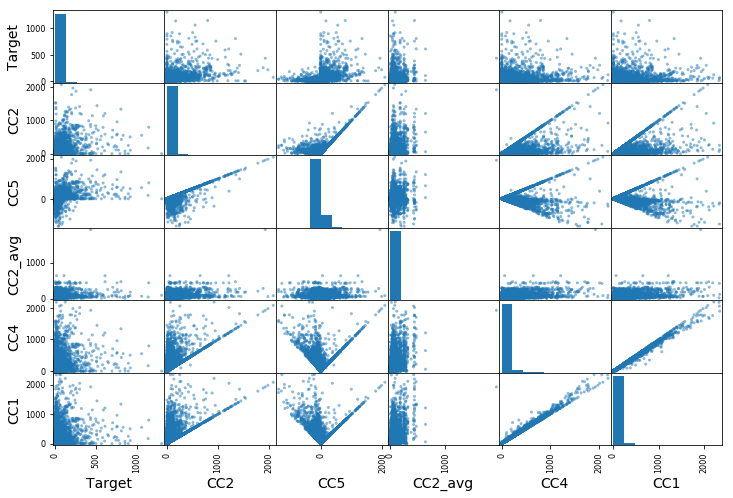

In [71]:
from pandas.plotting import scatter_matrix

attributes = ["Target","CC2","CC5","CC2_avg","CC4","CC1"]
scatter_matrix(dataset_1[attributes], figsize=(12, 8))
plt.show()